In [1]:
from importlib import reload  
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(0)

In [2]:
import DPPmodel

In [3]:
reload(DPPmodel)

<module 'DPPmodel' from 'C:\\SongyanHou\\Study\\Codes\\ErgodicControl\\DPPmodel.py'>

## Finite Horizon Approach

In [4]:
# Discreize parameters
steps = 100
dt = 0.01
sqrtdt = np.sqrt(dt)
T = steps * dt
M = 1000

## Brownian Motion

In [5]:
# Initialize the model 

# X_initial = np.zeros(shape = (M,1))
X_initial = np.random.normal(0,np.sqrt(1/2),size = (M,1))

model = DPPmodel.MODEL(steps,dt,T,M)
model.nn()
model.start(X_initial)
model.traindata(1)
model.dyna(name = 'bm')
model.build()

Loss1 under optimal control:  0.9962064418792724
Loss2 under optimal control:  1.819642171382904
Train on 1000 samples, validate on 1000 samples
Epoch 1/20
1000/1000 [==============================] - 16s 16ms/sample - loss: 0.9195 - val_loss: 0.8112
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8465 - val_loss: 0.8029
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8439 - val_loss: 0.8027
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8437 - val_loss: 0.8024
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8435 - val_loss: 0.8023
Epoch 6/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8434 - val_loss: 0.8021
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8433 - val_loss: 0.8020
Epoch 8/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.8433 - val_loss: 0.8020
Epoch 9/20
1000/1000 

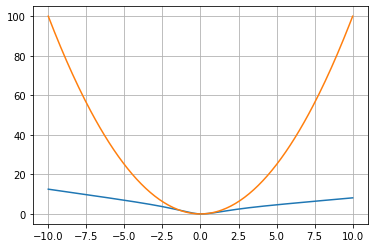

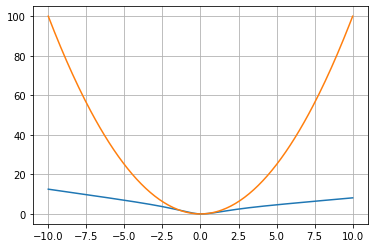

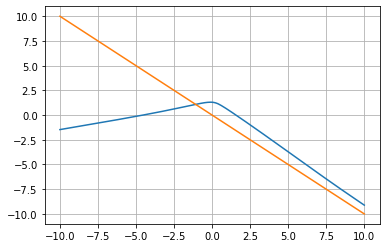

Optimal ergodic cost is:  0.8016579694747925
Mean and Var of terminal distribution:  0.77551126 0.8325374
2 th forward iteration
Loss1 under optimal control:  1.1990519638061523
Loss2 under optimal control:  4.234962485313416
Train on 1000 samples, validate on 1000 samples
Epoch 1/20
1000/1000 [==============================] - 17s 17ms/sample - loss: 2.4101 - val_loss: 1.8441
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.9012 - val_loss: 1.6198
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.7597 - val_loss: 1.5318
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.6959 - val_loss: 1.4892
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.6632 - val_loss: 1.4676
Epoch 6/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.6455 - val_loss: 1.4549
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.6346 - val_loss: 1.4

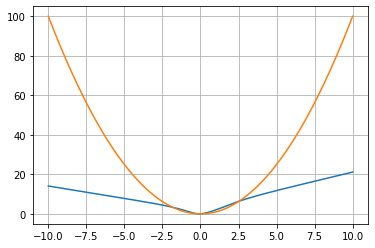

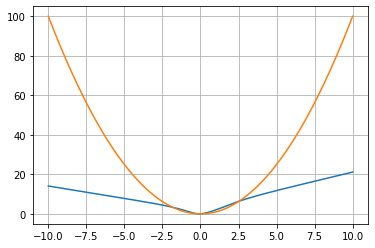

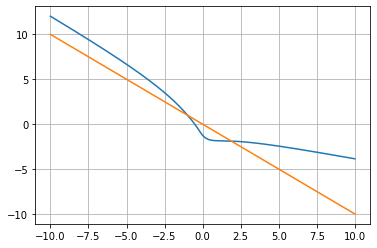

Optimal ergodic cost is:  1.4038712944984435
Mean and Var of terminal distribution:  -0.14175001 0.5587764



3 th forward iteration
Loss1 under optimal control:  1.013279329776764
Loss2 under optimal control:  2.3823178577423096
Train on 1000 samples, validate on 1000 samples
Epoch 1/20
1000/1000 [==============================] - 18s 18ms/sample - loss: 1.4469 - val_loss: 1.1833
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.1905 - val_loss: 1.0678
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.1132 - val_loss: 1.0267
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.0782 - val_loss: 1.0015
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.0561 - val_loss: 0.9857
Epoch 6/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.0427 - val_loss: 0.9748
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/sample - loss: 1.0332 - val_loss:

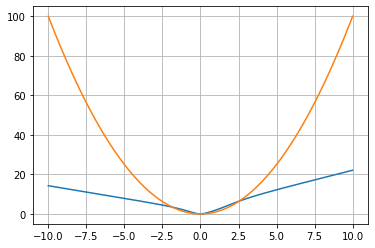

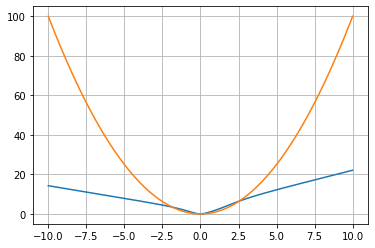

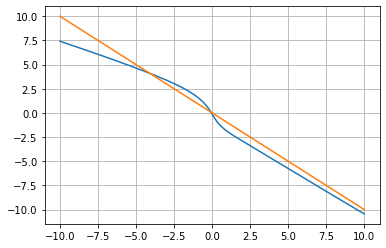

Optimal ergodic cost is:  0.9522137660980224
Mean and Var of terminal distribution:  -0.08822215 0.2861328



4 th forward iteration
Loss1 under optimal control:  0.9638389434814453
Loss2 under optimal control:  1.5006104068756103
Train on 1000 samples, validate on 1000 samples
Epoch 1/20
  32/1000 [..............................] - ETA: 6s

KeyboardInterrupt: 

In [6]:
model.autotrain()
RHO = [model.rhon]
for i in range(5):
    print(i+2,'th forward iteration')
    model.endtostart()
    model.autotrain()
    print('\n\n')
    RHO.append(model.rhon)

In [ ]:
print(RHO)
plt.semilogy(np.abs(np.array(RHO)-1),'o-')
plt.grid()
plt.show()